<div style="
    background: linear-gradient(135deg, #6a11cb, #2575fc); 
    padding: 30px; 
    border-radius: 25px; 
    box-shadow: 0 12px 30px rgba(0, 0, 0, 0.4), inset 0 1px 2px rgba(255, 255, 255, 0.2); 
    text-align: center; 
    margin: 40px auto; 
    max-width: 800px; 
    border: 3px solid rgba(255, 255, 255, 0.2); 
    transition: all 0.3s ease-in-out;">
    <h2 style="
        color: #ffffff; 
        font-size: 24px; 
        font-weight: 900; 
        font-family: 'Poppins', sans-serif; 
        margin: 0; 
        text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.3), 0 0 10px rgba(255, 255, 255, 0.7); 
        letter-spacing: 1px; 
        text-transform: uppercase;">
        🚀 Data Preprocessing and Feature Engineering
    </h2>
</div>


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import catboost as cb
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')

numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=[object]).columns.tolist()

numerical_cols.remove('loan_status')

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

y = df['loan_status']
if not np.array_equal(np.unique(y), [0, 1]):
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

X = df.drop('loan_status', axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<div style="
    background: linear-gradient(135deg, #6a11cb, #2575fc); 
    padding: 30px; 
    border-radius: 25px; 
    box-shadow: 0 12px 30px rgba(0, 0, 0, 0.4), inset 0 1px 2px rgba(255, 255, 255, 0.2); 
    text-align: center; 
    margin: 40px auto; 
    max-width: 800px; 
    border: 3px solid rgba(255, 255, 255, 0.2); 
    transition: all 0.3s ease-in-out;">
    <h2 style="
        color: #ffffff; 
        font-size: 24px; 
        font-weight: 900; 
        font-family: 'Poppins', sans-serif; 
        margin: 0; 
        text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.3), 0 0 10px rgba(255, 255, 255, 0.7); 
        letter-spacing: 1px; 
        text-transform: uppercase;">
        🔹 XGBoost Model Training and Evaluation
    </h2>
</div>


In [2]:
xgb_model = xgb.XGBClassifier(eval_metric="logloss", random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)
y_pred_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]

print("XGBoost Accuracy:", accuracy_score(y_val, y_pred_xgb))
print("XGBoost AUC-ROC:", roc_auc_score(y_val, y_pred_proba_xgb))

XGBoost Accuracy: 0.9525961292522807
XGBoost AUC-ROC: 0.9544392530417765


<div style="
    background: linear-gradient(135deg, #6a11cb, #2575fc); 
    padding: 30px; 
    border-radius: 25px; 
    box-shadow: 0 12px 30px rgba(0, 0, 0, 0.4), inset 0 1px 2px rgba(255, 255, 255, 0.2); 
    text-align: center; 
    margin: 40px auto; 
    max-width: 800px; 
    border: 3px solid rgba(255, 255, 255, 0.2); 
    transition: all 0.3s ease-in-out;">
    <h2 style="
        color: #ffffff; 
        font-size: 24px; 
        font-weight: 900; 
        font-family: 'Poppins', sans-serif; 
        margin: 0; 
        text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.3), 0 0 10px rgba(255, 255, 255, 0.7); 
        letter-spacing: 1px; 
        text-transform: uppercase;">
        🔹 CatBoost Model Training and Evaluation
    </h2>
</div>


In [3]:
cat_model = cb.CatBoostClassifier(iterations=500, learning_rate=0.05, depth=10, random_state=42, verbose=0)
cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_val)
y_pred_proba_cat = cat_model.predict_proba(X_val)[:, 1]

print("CatBoost Accuracy:", accuracy_score(y_val, y_pred_cat))
print("CatBoost AUC-ROC:", roc_auc_score(y_val, y_pred_proba_cat))

CatBoost Accuracy: 0.9533634580953193
CatBoost AUC-ROC: 0.9526089525392182


<div style="
    background: linear-gradient(135deg, #6a11cb, #2575fc); 
    padding: 30px; 
    border-radius: 25px; 
    box-shadow: 0 12px 30px rgba(0, 0, 0, 0.4), inset 0 1px 2px rgba(255, 255, 255, 0.2); 
    text-align: center; 
    margin: 40px auto; 
    max-width: 800px; 
    border: 3px solid rgba(255, 255, 255, 0.2); 
    transition: all 0.3s ease-in-out;">
    <h2 style="
        color: #ffffff; 
        font-size: 24px; 
        font-weight: 900; 
        font-family: 'Poppins', sans-serif; 
        margin: 0; 
        text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.3), 0 0 10px rgba(255, 255, 255, 0.7); 
        letter-spacing: 1px; 
        text-transform: uppercase;">
        🔹 Random Forest Model Training and Evaluation
    </h2>
</div>


In [4]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
y_pred_proba_rf = rf_model.predict_proba(X_val)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_val, y_pred_rf))
print("Random Forest AUC-ROC:", roc_auc_score(y_val, y_pred_proba_rf))

Random Forest Accuracy: 0.949356296359451
Random Forest AUC-ROC: 0.936624569654481


<div style="
    background: linear-gradient(135deg, #6a11cb, #2575fc); 
    padding: 30px; 
    border-radius: 25px; 
    box-shadow: 0 12px 30px rgba(0, 0, 0, 0.4), inset 0 1px 2px rgba(255, 255, 255, 0.2); 
    text-align: center; 
    margin: 40px auto; 
    max-width: 800px; 
    border: 3px solid rgba(255, 255, 255, 0.2); 
    transition: all 0.3s ease-in-out;">
    <h2 style="
        color: #ffffff; 
        font-size: 24px; 
        font-weight: 900; 
        font-family: 'Poppins', sans-serif; 
        margin: 0; 
        text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.3), 0 0 10px rgba(255, 255, 255, 0.7); 
        letter-spacing: 1px; 
        text-transform: uppercase;">
        🔹 Extra Trees Classifier Model Training and Evaluation
    </h2>
</div>


In [5]:
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

y_pred_et = et_model.predict(X_val)
y_pred_proba_et = et_model.predict_proba(X_val)[:, 1]

print("Extra Trees Accuracy:", accuracy_score(y_val, y_pred_et))
print("Extra Trees AUC-ROC:", roc_auc_score(y_val, y_pred_proba_et))

Extra Trees Accuracy: 0.9487594850370875
Extra Trees AUC-ROC: 0.926066817952993


<div style="
    background: linear-gradient(135deg, #6a11cb, #2575fc); 
    padding: 30px; 
    border-radius: 25px; 
    box-shadow: 0 12px 30px rgba(0, 0, 0, 0.4), inset 0 1px 2px rgba(255, 255, 255, 0.2); 
    text-align: center; 
    margin: 40px auto; 
    max-width: 800px; 
    border: 3px solid rgba(255, 255, 255, 0.2); 
    transition: all 0.3s ease-in-out;">
    <h2 style="
        color: #ffffff; 
        font-size: 24px; 
        font-weight: 900; 
        font-family: 'Poppins', sans-serif; 
        margin: 0; 
        text-shadow: 3px 3px 6px rgba(0, 0, 0, 0.3), 0 0 10px rgba(255, 255, 255, 0.7); 
        letter-spacing: 1px; 
        text-transform: uppercase;">
        🔹 Neural Network Model Training and Evaluation
    </h2>
</div>


In [6]:
nn_model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') 
])
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nn_model.fit(X_train, y_train, epochs=111, batch_size=32, validation_data=(X_val, y_val), verbose=1)
y_pred_nn = nn_model.predict(X_val).flatten()
y_pred_proba_nn = y_pred_nn

print("Neural Network Accuracy:", accuracy_score(y_val, (y_pred_proba_nn > 0.5).astype(int)))
print("Neural Network AUC-ROC:", roc_auc_score(y_val, y_pred_proba_nn))

Epoch 1/111
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8593 - loss: 0.3480 - val_accuracy: 0.9020 - val_loss: 0.2516
Epoch 2/111
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8991 - loss: 0.2649 - val_accuracy: 0.9135 - val_loss: 0.2342
Epoch 3/111
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9057 - loss: 0.2513 - val_accuracy: 0.9178 - val_loss: 0.2264
Epoch 4/111
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9125 - loss: 0.2385 - val_accuracy: 0.9178 - val_loss: 0.2248
Epoch 5/111
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9151 - loss: 0.2355 - val_accuracy: 0.9250 - val_loss: 0.2176
Epoch 6/111
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9167 - loss: 0.2294 - val_accuracy: 0.9304 - val_loss: 0.2110
Epoch 7/111
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9193 - loss: 0.2298 - val_accuracy: 0.9310 - val_loss: 0.2124
Epoch 8/111
1467/1467 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9203 - loss: 0

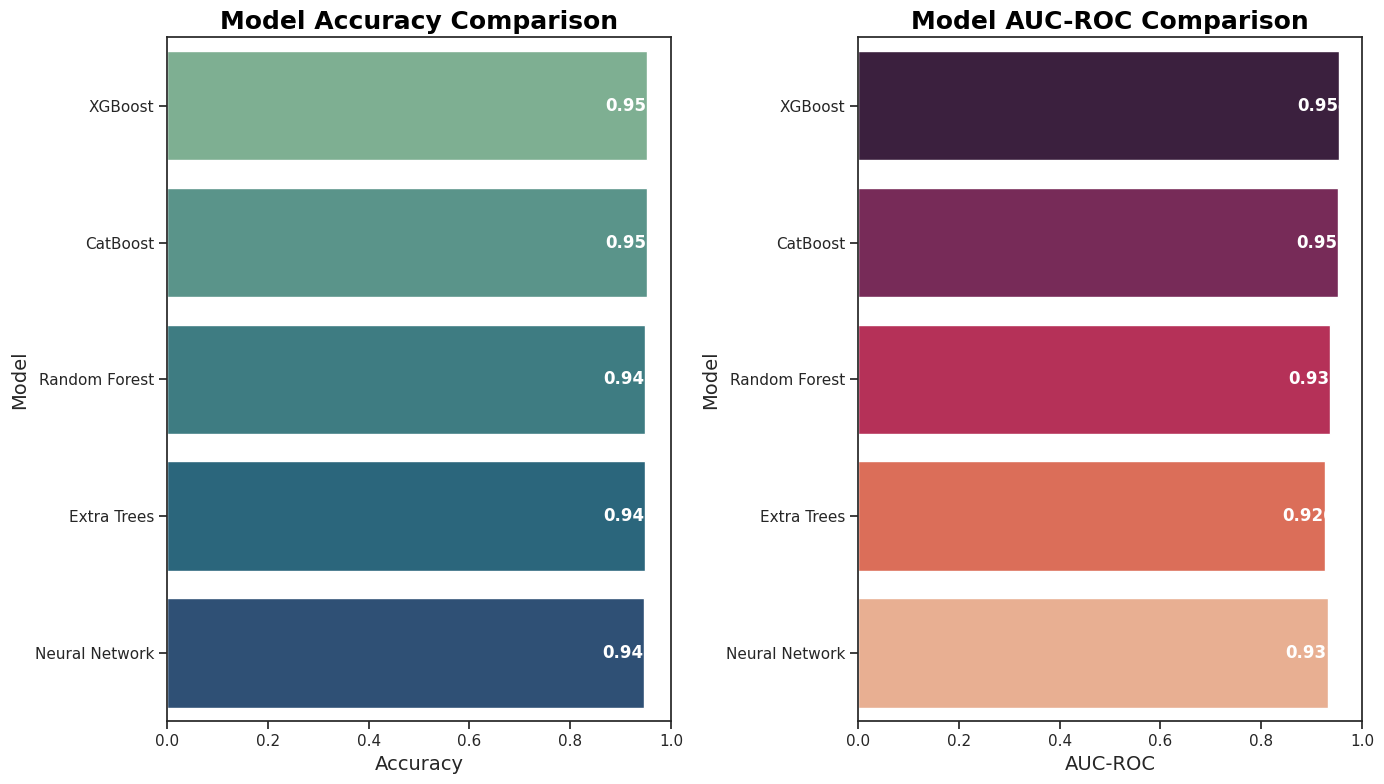

In [7]:
model_names = ['XGBoost', 'CatBoost', 'Random Forest', 'Extra Trees', 'Neural Network']
accuracies = [0.9525, 0.9533, 0.9493, 0.9487, 0.9467]  
auc_roc_scores = [0.9544, 0.9526, 0.9366, 0.9260, 0.9318]  

performance_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'AUC-ROC': auc_roc_scores
})
plt.figure(figsize=(14, 8))
sns.set(style="ticks")  # Ticks style for a sharp and professional look

ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='Accuracy', y='Model', data=performance_df, palette='crest', ax=ax1)
ax1.set_title('Model Accuracy Comparison', fontsize=18, fontweight='bold', color='black')
ax1.set_xlabel('Accuracy', fontsize=14)
ax1.set_ylabel('Model', fontsize=14)
ax1.set_xlim(0, 1)

for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.4f}', (p.get_x() + p.get_width() - 0.02, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', fontsize=12, color='white', fontweight='bold')

ax2 = plt.subplot(1, 2, 2)
sns.barplot(x='AUC-ROC', y='Model', data=performance_df, palette='rocket', ax=ax2)
ax2.set_title('Model AUC-ROC Comparison', fontsize=18, fontweight='bold', color='black')
ax2.set_xlabel('AUC-ROC', fontsize=14)
ax2.set_ylabel('Model', fontsize=14)
ax2.set_xlim(0, 1)

for p in ax2.patches:
    ax2.annotate(f'{p.get_width():.4f}', (p.get_x() + p.get_width() - 0.02, p.get_y() + p.get_height() / 2),
                 ha='center', va='center', fontsize=12, color='white', fontweight='bold')

plt.tight_layout()
plt.show()